# Project Over view

<p align = "Justify">Perkembangan industri buku saat ini terus mengalami kemajuan, dengan banyaknya judul dan penulis yang menawarkan cerita menarik, informatif, dan menginspirasi. Penerbit besar maupun independen berlomba-lomba menyajikan karya terbaik mereka, baik dalam bentuk cetak maupun digital. Di era digital sekarang, platform pembelian dan pembacaan buku seperti Goodreads, Amazon, dan Google Books semakin memudahkan kita untuk mengakses ribuan bahkan jutaan judul buku.Namun, dengan begitu banyaknya pilihan buku yang tersedia, pembaca seringkali kebingungan dalam memilih buku yang sesuai dengan selera dan kebutuhannya. Hal ini juga menjadi tantangan tersendiri bagi penulis dan penerbit untuk mengetahui preferensi pembaca dan tren pasar.Oleh karena itu, sistem rekomendasi buku hadir sebagai solusi untuk membantu pembaca menemukan buku yang sesuai dengan minat mereka berdasarkan judul, Author, rating, dan preferensi pengguna lainnya. Sistem ini juga dapat membantu penerbit dan penulis memahami arah selera pasar dalam pengembangan buku selanjutnya.</p>

# Buisnees Understanding

### Problem
* Bagaimana cara melakukan pra-pemrosesan pada data Dataset yang akan digunakan agar dapat membuat model yang baik menggunakan teknik content based filtering dan dan collaborative filtering?
* Bagaimana memberikan rekomendasi Buku berdasarkan Data pada setiap judul Buku yang pelanggan input sehingga dapat memberikan preferensi yang sesuai Konsumen inginkan?

### Goals
* Melakukan pra-pemrosesan pada dataset agar nantinya dapat diproses pada model yang menggunaan teknik content based filltering dan collaborative filltering.
* Memberikan referensi judul buku untuk mempermudah pelanggan mencari buku yang sesuai dengan selera mereka dengan model yang sudah dibangun.

### Problem Statment
untuk mencapai Goals yang ada dapat melakukan bebrapa solusi yaitu :
* Untuk tujuan pertama, melakukan pra-pemrosesan data dengan bebrapa teknik yaitu:
  * Memeriksa masalah data yang ada dalam dataset.
  * Melakukan visualisasi data untuk mempelajari data.
  * Membersihkan judul buku yang duplikat dalam dataset
* Untuk tujuan kedua yaitu membuat rekomendasi judul buku kepada pengguna dengan menggunakan dua metode yaitu Content based filltering dan collaborative filltering.
  * Content based filltering.
    <br>adalah metode yang memilih item berdasarkan korelasi antara konten item dan preferensi pengguna <a href = "https://users.ics.forth.gr/~potamias/mlnia/paper_6.pdf">[2]</a>, Content-based filtering
    mempelajari profil minat pengguna baru berdasarkan data dari objek yang telah
    dinilai pengguna. Algoritma ini bekerja dengan menyarankan item serupa yang pernah disukai di masa lalu atau sedang dilihat di masa kini kepada pengguna. Metode ini memiliki kelebihan dan kekurangan
    diantarinya adalah :
    * Kelebihan
      <br>Metode ini tidak bergantung pada pengguna lain karena menggunakan data milik sendiri.
    * Kekurangan
      <br>Tidak cocok untuk new user karena metode ini sangat memerlukan data riwayat dari pengguna.
  * Collaborative filltering
    <br>adalah metode yang bekerja dengan dengan mencari sekelompok besar orang dan menemukan sekelompok kecil pengguna dengan selera yang mirip dengan pengguna tertentu. Ia melihat item yang mereka sukai dan
    menggabungkannya untuk membuat daftar saran yang diberi peringkat. Metode ini juga memiliki kelebihan dan kekurangan yaitu :
    * Kelebihan
      <br>Metode ini tidak bergantung pada informasi item secara eksplisit karena mengandalkan pola interaksi antar pengguna.
    * Kekurangan
      <br>Tidak cocok untuk pengguna baru karena metode ini sangat memerlukan riwayat interaksi untuk menghasilkan rekomendasi.


## Import Libary yang dibutuh

In [74]:
import pandas as pd
import numpy as np
import math
from pathlib import Path
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error

## Data Understanding

Dalam Project ini menggunakan dataset yang sudah tersedia dalam situs Kaggle, dimana data ini memiliki 3 buah data inti yaitu data buku, rating, user pada data ini terdapat fitur yang bisa digunakan untuk membuat sebuah sistem rekomendasi yang bisa memberikan referensi buku yang sesuai dengan pendekatan dari pengguna. <br>
Referensi [Dataset](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/data) <br>

In [75]:
Books = pd.read_csv('/content/drive/MyDrive/Books.csv')
Ratings = pd.read_csv('/content/drive/MyDrive/Ratings.csv')
Users = pd.read_csv('/content/drive/MyDrive/Users.csv')

print("Jumlah Data Buku : ", len(Books))
print("Jumlah Data Rating : ", len(Ratings))
print("Jumlah Data User : ", len(Users))

<ipython-input-75-29b4227ef756>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  Books = pd.read_csv('/content/drive/MyDrive/Books.csv')


Jumlah Data Buku :  271360
Jumlah Data Rating :  1149780
Jumlah Data User :  278858


Pada Data ini terdapat 3 file csv <br>


*   Books.csv <br>
Berisikan Data dari Buku yang ada mulai dari Judul, Author, Publiser, tahun rilis dan yang lainnya yang berkaitan dengan Buku
*   Ratings.csv <br>
Berisikan Data Penilaian pada Buku dari User yang membacanya
*  User.csv <br>
Berisikan data dari pembaca / User mulai dari umur sampai tempat tinggal mereka



In [76]:
Books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


### Books CSV
Pada data Books.csv terdapat 8 kolom data yang berisikan 271360 baris data.<br>
- ISBN Merupakan kode unik identifikasi buku (International Standard Book Number).
- Book-Title Data Judul Buku yang ada
- Book-Author Data Penulis Buku
- Year-Of-Publication Data Tahun Buku itu diterbitkan
- Publisher Data Para Publisher Buku
- Image-URL-S Data URL gambar kecil dari sampul buku.
- Iamage-URL-M Data URL gambar sedang dari sampul buku.
- Image-URL-L Data URL gambar besar dari sampul buku.

In [77]:
Ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


### Rating CSV
Pada data Rating.csv terdapat 3 kolom data yang berisikan 1149780 baris data <br>
- User-Id adalah Data ID dari User
- ISBN adalah kode unik dari buku (International Standar Book Number)
- Book Rating Data Rating dari user untuk Buku yang dibaca


In [78]:
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


### User CSV
Pada data User.csv terdapat 3 kolom data yang berisikan 278858  baris data <br>
- User-Id adalah Data ID dari User
- Location adalah yang berisikan location dari User
- Age adalah data yang berisikan info umur dari User

# EDA (Explonary Data Analysis)

In [79]:
print(Books.shape)
print(Users.shape)
print(Ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


Dilihat Data Books memiliki 8 kolom dengan jumlah baris per kolom adalah 271360 <br>
Untuk Data User memilki 3 kolom dengan jumlah baris per kolom adalah 278858 <br>
Dan untuk Data Ratings memiliki 3 kolom dengan jumlah baris per kolom adalah 1149780

In [80]:
# Memeriksa Nilai Missing Value
print("Nilai Missing Value pada Data Books:")
print(Books.isnull().sum(), "\n")

print("Nilai Missing Value pada Data Users:")
print(Users.isnull().sum(), "\n")

print("Nilai Missing Value pada Data Ratings:")
print(Ratings.isnull().sum())

Nilai Missing Value pada Data Books:
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64 

Nilai Missing Value pada Data Users:
User-ID          0
Location         0
Age         110762
dtype: int64 

Nilai Missing Value pada Data Ratings:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


Dilihat Pada colom Age pada data User terdapat nilai Missing Value yang sangat besar, namun akan sangat beresiko untuk menghapus 110762 data tersebut karena akan sangat berpengaruh pada model nantinya


In [81]:
# Memeriksa Nilai Duplikat
print("Nilai Duplikat pada Data Books:")
print(Books.duplicated().sum(), "\n")

print("Nilai Duplikat pada Data Users:")
print(Users.duplicated().sum(), "\n")

print("Nilai Duplikat pada Data Ratings:")
print(Ratings.duplicated().sum())

Nilai Duplikat pada Data Books:
0 

Nilai Duplikat pada Data Users:
0 

Nilai Duplikat pada Data Ratings:
0


Disemua dataset bersih dengan tidak ada data yang duplikat

## Visual Data

Selanjutnya yaitu melakukan visualisasi dengan tujuan yaitu:
* Melihat Author Terbanyak dan Top Publisher
* Melihat Trend Tahun Distribusi Buku
* Melihat Jumlah Rating Buku

### Mencari Top Author dan Top Publisher

<ipython-input-82-e06446b1439e>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, fontsize=6)
<ipython-input-82-e06446b1439e>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, fontsize=6)


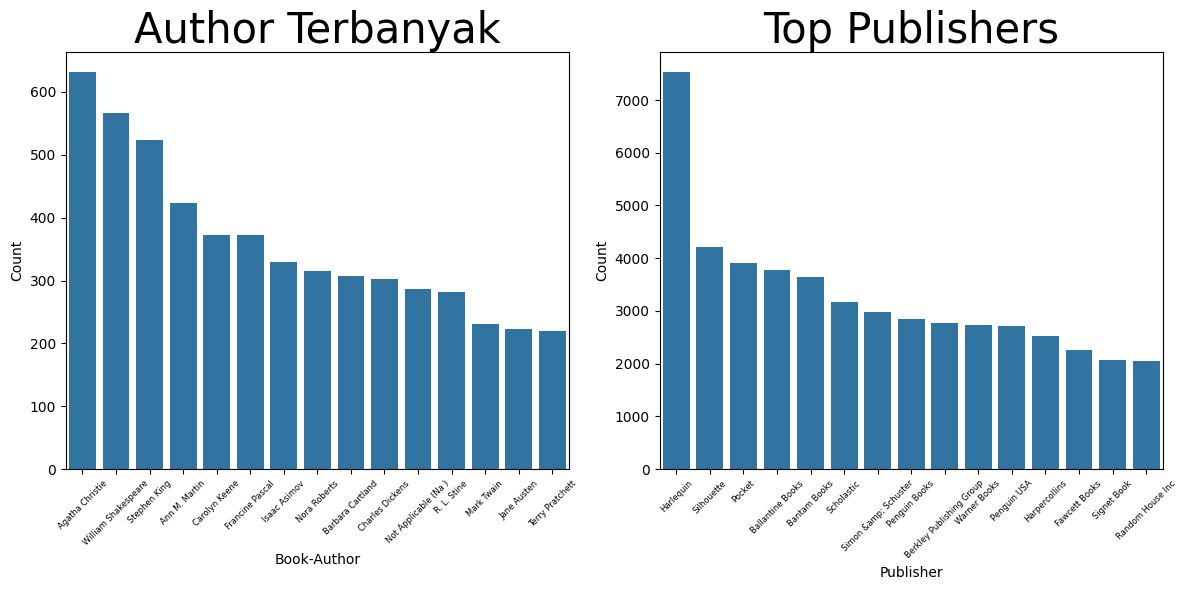

In [82]:
total_author = Books['Book-Author'].value_counts().reset_index(name='Count').sort_values('Count', ascending=False).head(15)

total_publisher = Books['Publisher'].value_counts().reset_index(name='Count').sort_values('Count', ascending=False).head(15)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.barplot(data=total_author, x='Book-Author', y='Count', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, fontsize=6)
ax1.set_title('Author Terbanyak', size=30)

ax2 = sns.barplot(data=total_publisher, x='Publisher', y='Count', ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, fontsize=6)
ax2.set_title('Top Publishers', size=30)

plt.tight_layout()

Disini Dilihat Bahwa Untuk Author Terbanyak yaitu ada Agatha Christie sebanyak lebih dari 600 buku yang ada dan kemudian di bagian publisher yaitu ada Harlequin yang menjadi top publisher dengan lebih dari 7000 buku

### Melihat Tren Distribusi Buku

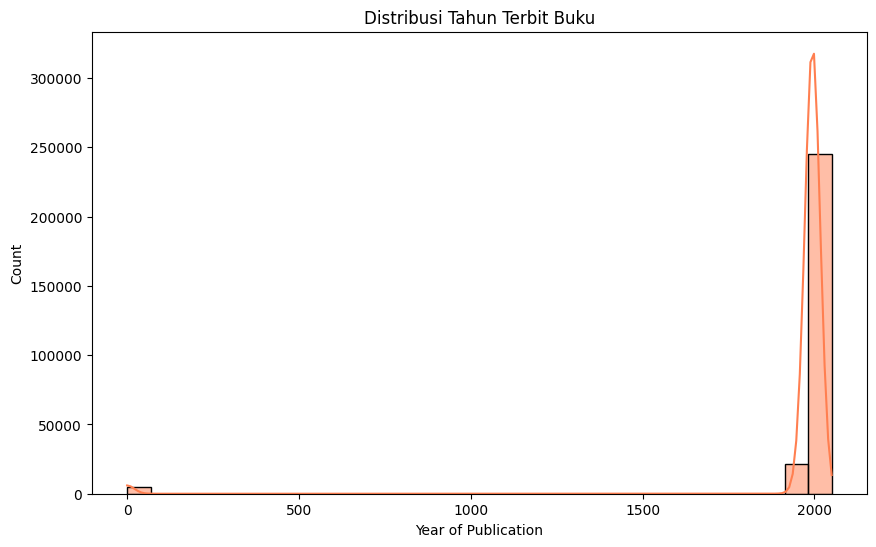

In [83]:
Books['Year-Of-Publication'] = pd.to_numeric(Books['Year-Of-Publication'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.histplot(Books['Year-Of-Publication'].dropna(), bins=30, kde=True, color='coral')
plt.title("Distribusi Tahun Terbit Buku")
plt.xlabel("Year of Publication")
plt.ylabel("Count")
plt.show()

Pada Chart Di atas, dilihat ada sedikit kejanggalan yaitu ada buku yang diterbitkan pada tahun 0, mungkin ada kesalahan pada colom Year-Of-Publication. namun juga bisa dilihat bahwa sebagian besar buku di distribusi pada tahun 2000

In [84]:
Books['Year-Of-Publication'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984.,    0., 1968., 1961., 1958., 1974., 1976., 1971., 1977.,
       1975., 1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966.,
       1920., 1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969.,
       1954., 1950., 1967., 2005., 1957., 1940., 1937., 1955., 1946.,
       1936., 1930., 2011., 1925., 1948., 1943., 1947., 1945., 1923.,
       2020., 1939., 1926., 1938., 2030., 1911., 1904., 1949., 1932.,
       1928., 1929., 1927., 1931., 1914., 2050., 1934., 1910., 1933.,
       1902., 1924., 1921., 1900., 2038., 2026., 1944., 1917., 1901.,
       2010., 1908., 1906., 1935., 1806., 2021., 2012., 2006.,   nan,
       1909., 2008., 1378., 1919., 1922., 1897., 2024., 1376., 2037.])

Dilihat disini terdapat data yang bernilai 0 dan ada juga yang bernilai Nan

<ipython-input-85-bc99b8d9143c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Book-Rating', data=Ratings, palette='viridis')


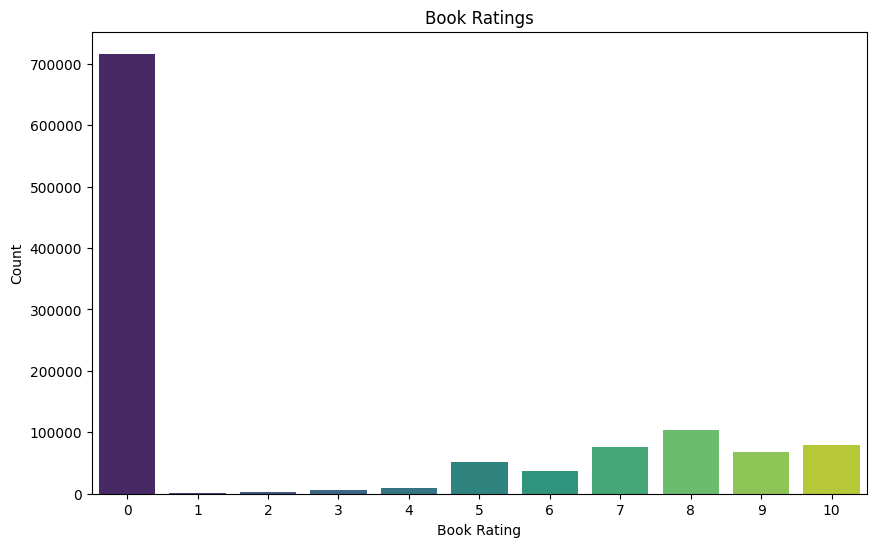

In [85]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Book-Rating', data=Ratings, palette='viridis')
plt.title("Book Ratings")
plt.xlabel("Book Rating")
plt.ylabel("Count")
plt.show()

In [86]:
Ratings['Book-Rating'].value_counts()

,count
Book-Rating,
0,716109
8,103736
10,78610
7,76457
9,67541
5,50974
6,36924
4,8904
3,5996


Dilihat Dari Data ini Ada Banyak Buku yang mendapatkan rating 0, dan yang paling dikit adalah buku yang mendpatkan rating 1

# Data Preparation

Pada Tahapan ini ada beberapa yang perlu dilakukan untuk selanjutnya membuat Model Yaitu:
* Memperbaiki type data pada colom Year-Of-Publication dan Age
* Memperbaiki data yang memiliki missing value
* Menghapus data nan pada Year-of-publication
* Menggabung Dataset Books dan Ratings



### Memperbaiki Type Data


In [87]:
Books['Year-Of-Publication'] = Books['Year-Of-Publication'].astype('Int64')
Users['Age'] = Users['Age'].astype('Int64')

In [88]:
Books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271357 non-null  Int64 
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: Int64(1), object(7)
memory usage: 16.8+ MB


In [89]:
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   User-ID   278858 non-null  int64 
 1   Location  278858 non-null  object
 2   Age       168096 non-null  Int64 
dtypes: Int64(1), int64(1), object(1)
memory usage: 6.6+ MB


### Memperbaiki Missing Value

In [90]:
Books = Books.dropna(subset=['Book-Author', 'Publisher', 'Image-URL-L'])

In [91]:
Books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0


In [92]:
Books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271353 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271353 non-null  object
 1   Book-Title           271353 non-null  object
 2   Book-Author          271353 non-null  object
 3   Year-Of-Publication  271353 non-null  Int64 
 4   Publisher            271353 non-null  object
 5   Image-URL-S          271353 non-null  object
 6   Image-URL-M          271353 non-null  object
 7   Image-URL-L          271353 non-null  object
dtypes: Int64(1), object(7)
memory usage: 18.9+ MB


Untuk Bagian Colom Age, akan menggunakan metode mengisi nilai Missing Value dengan median dari nilai colom Age

In [93]:
Users['Age'].describe()

,Age
count,168096.0
mean,34.751434
std,14.428097
min,0.0
25%,24.0
50%,32.0
75%,44.0
max,244.0


In [94]:
Users['Age'] = Users['Age'].fillna(Users['Age'].median())


In [95]:
Users.isnull().sum()

,0
User-ID,0
Location,0
Age,0


### Memperbaiki outlier pada Year-of-publication


In [96]:
Books = Books[Books['Year-Of-Publication'].notna()]
Books = Books[(Books['Year-Of-Publication'] >= 1900) & (Books['Year-Of-Publication'] <= 2025)]

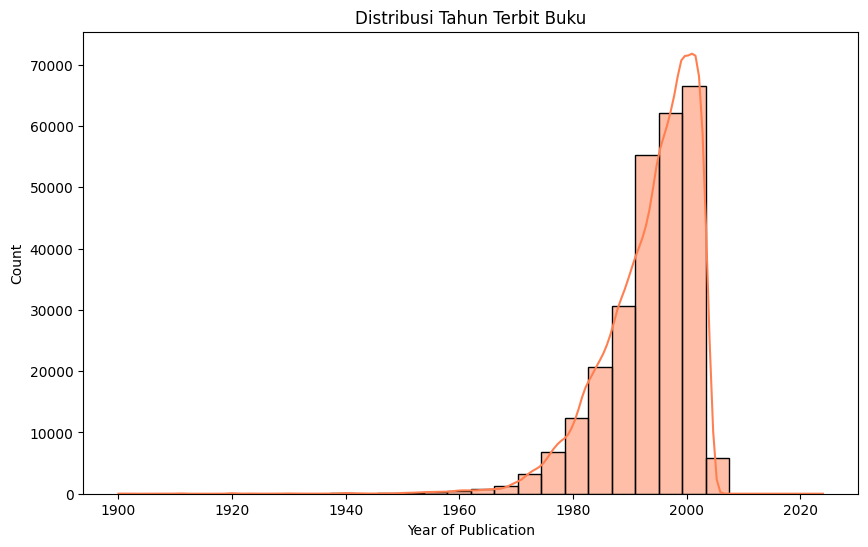

In [97]:
Books['Year-Of-Publication'] = pd.to_numeric(Books['Year-Of-Publication'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.histplot(Books['Year-Of-Publication'].dropna(), bins=30, kde=True, color='coral')
plt.title("Distribusi Tahun Terbit Buku")
plt.xlabel("Year of Publication")
plt.ylabel("Count")
plt.show()

In [98]:
Books['Year-Of-Publication'].unique()

<IntegerArray>
[2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998,
 ...
 1906, 1935, 2021, 2012, 2006, 1909, 2008, 1919, 1922, 2024]
Length: 106, dtype: Int64

### Menggabung Dataset Books dan Ratings

Untuk Membuat system rekomendasi, kita akan menggunakan dua dataset Ratings dan Books untuk mencari rekomendasi buku dengan referensi ratings, dan juga dengan menggabungkan kedua data buku dan rating untuk mendapatkan top buku populer yang ada


In [99]:
rating_buku = Ratings.merge(Books,on='ISBN')
rating_buku.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [100]:
jumlah_rating = rating_buku.groupby('Book-Title').count()['Book-Rating'].reset_index()
jumlah_rating.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
jumlah_rating.head()

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


kode ini membuat kita mendapatkan berapakali sebuah buku itu mendapatkan rating dari User


In [101]:
rata_rating = rating_buku.groupby('Book-Title')['Book-Rating'].mean().reset_index()

rata_rating.rename(columns={'Book-Rating': 'avg_rating'}, inplace=True)

rata_rating.head()

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


Dalam Kode ini kita mencari nilai rata-rata rating dari sebuah buku

In [102]:
popular_buku = jumlah_rating.merge(rata_rating, on='Book-Title')

popular_buku.head()

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00


Dalam Kode ini kita menambahkan jumlah rating dan rata-rata rating ke dalam dataframe Book-Title, untuk diolah agar mendapatkan list buku populer dalam dataset


In [103]:
popular_buku = popular_buku[popular_buku['num_ratings'] >= 300]

popular_buku = popular_buku.sort_values('avg_rating', ascending=False).head(50)

Untuk mencari buku yang populer harus memahami bahwa buku yang banyak diberi rating berarti buku itu memiliki potensi untuk menjadi buku yang populer. pada kode ini kita mengatur untuk menampilkan buku yang dirating lebih dari 300 kali dan menampilkan 50 buku yang memiliki rata-rata rating paling tinggi

In [104]:
popular_buku = popular_buku.merge(Books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

Dalam dataframe populer buku menambahkan colom 'Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating' untuk memudahkan dibaca

In [105]:
popular_buku

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
9,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
12,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
21,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
23,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000
31,The Da Vinci Code,Dan Brown,http://images.amazon.com/images/P/0385504209.0...,897,4.647715
36,The Catcher in the Rye,J.D. Salinger,http://images.amazon.com/images/P/0316769487.0...,436,4.646789
42,The Five People You Meet in Heaven,Mitch Albom,http://images.amazon.com/images/P/0786868716.0...,430,4.551163


# Modeling and Result

Dalam Proyek ini memakai dua algoritma yaitu :


*   Collaborative Filtering
*   content based filltering



### Collaboraive Filtering

Collaborative filltering adalah sistem rekomendasi yang berdasarkan kemiripan dari rating yang diberikan oleh user kepada buku<br> pada metode ini menggunakan base model yaitu matrix factorization

In [106]:
user_rating_counts = rating_buku.groupby('User-ID').count()['Book-Rating'] > 200

good_reader = user_rating_counts[user_rating_counts].index

In [107]:
filtered_rating = rating_buku[rating_buku['User-ID'].isin(good_reader)]


In [108]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [109]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]


In [110]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')


In [111]:
pt.fillna(0,inplace=True)


In [112]:
pt.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
similarity_scores = cosine_similarity(pt)


In [114]:
similarity_scores.shape


(698, 698)

In [115]:
def recommend(book_name):
    """
    Memasukan Judul Buku, dan function ini akan memberikan top 5 buku yang mirip
    sesuai dengan consep collaborative filltering
    """

    index = np.where(pt.index == book_name)[0][0]

    similar_items = sorted(list(enumerate(similarity_scores[index])),
                           key=lambda x: x[1], reverse=True)[1:6]

    recommendations = []

    for i in similar_items:
        book_info = []
        temp_df = Books[Books['Book-Title'] == pt.index[i[0]]]

        book_info.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        book_info.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        book_info.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))


        recommendations.append(book_info)

    return recommendations

In [116]:
recommend('The Secret Life of Bees')

[['Under the Tuscan Sun',
  'Frances Mayes',
  'http://images.amazon.com/images/P/0767900383.01.MZZZZZZZ.jpg'],
 ['Snow Falling on Cedars',
  'David Guterson',
  'http://images.amazon.com/images/P/0151001006.01.MZZZZZZZ.jpg'],
 ['Wicked: The Life and Times of the Wicked Witch of the West',
  'Gregory Maguire',
  'http://images.amazon.com/images/P/0060987103.01.MZZZZZZZ.jpg'],
 ['The Five People You Meet in Heaven',
  'Mitch Albom',
  'http://images.amazon.com/images/P/0786868716.01.MZZZZZZZ.jpg'],
 ['A Painted House',
  'John Grisham',
  'http://images.amazon.com/images/P/044023722X.01.MZZZZZZZ.jpg']]

### Content Based Filltering

Pada Metode Content Based Filltering disini menggunakan kemiripan yaitu author yang mirip atau memiliki gaya penulisan yang sama, jadi jika user menyukai karya author A maka sistem akan memberikan rekomendasi author yang memiliki penulisan yang mirip

In [117]:
author_df = Books[['Book-Author']].drop_duplicates()
author_df = author_df[author_df['Book-Author'].notna()].reset_index(drop=True)


In [118]:
author_df.head()


,Book-Author
0,Mark P. O. Morford
1,Richard Bruce Wright
2,Carlo D'Este
3,Gina Bari Kolata
4,E. J. W. Barber


In [119]:
# Vectorizer + TF-IDF
vectorizer = TfidfVectorizer()
author_matrix = vectorizer.fit_transform(author_df['Book-Author'])

In [120]:
# Mapping nama penulis ke index
author_to_index = pd.Series(author_df.index, index=author_df['Book-Author'].str.lower()).drop_duplicates()


In [121]:
from sklearn.metrics.pairwise import cosine_similarity

def get_similar_authors_efficient(author_name, top_n=5):
    author_name = author_name.lower()

    if author_name not in author_to_index:
        return "Penulis tidak ditemukan."

    idx = author_to_index[author_name]
    author_vec = author_matrix[idx]  # ini sparse, hemat RAM

    # Hitung kemiripan hanya dari 1 ke semua
    similarities = cosine_similarity(author_vec, author_matrix)[0]

    # Urutkan dan ambil top N
    similar_indices = similarities.argsort()[::-1][1:top_n+1]
    similar_authors = author_df.iloc[similar_indices]['Book-Author'].values.tolist()

    return similar_authors


In [122]:
get_similar_authors_efficient("Richard Bruce Wright")

['Bruce Wright',
 'Richard Wright',
 'Richard B. Wright',
 'Richard A. Wright',
 'Richard B Wright']

# EVALUASI

# Content Based Filtering

pada evaluasi model Content Based Filtering disini harus membuat sebuah ground data<br>
untuk membuat data penulis dan buku yang disukai oleh USer sebagai Based User

In [123]:
def create_ground_truth():
    """
    Membuat ground truth untuk evaluasi berdasarkan asumsi penulis dari
    publisher yang sama memiliki gaya penulisan yang mirip.
    """
    similar_authors = {}

    # Kelompokkan penulis berdasarkan publisher
    author_publishers = Books.dropna(subset=['Book-Author', 'Publisher'])\
                            .groupby('Publisher')['Book-Author'].unique()

    for publisher, authors in author_publishers.items():
        if len(authors) > 1:  # Hanya publisher dengan lebih dari 1 penulis
            for author in authors:
                if author not in similar_authors:
                    similar_authors[author] = []
                # Tambahkan semua penulis dari publisher yang sama sebagai "mirip"
                similar_authors[author].extend([a for a in authors if a != author])

    return similar_authors

Kemudian adalah pembuatan matrik evaluasi, dimana disini menggunakan:
* Precision
* recalls

dengan jumlah yang dievaluasi disini adalah 5

In [124]:
def evaluate_cbf_metrics(test_authors, ground_truth, k=5):
    """
    Evaluasi model Content-Based Filtering menggunakan precision dan recall

    Args:
        test_authors: List penulis untuk dievaluasi
        ground_truth: Dictionary penulis -> list penulis yang relevan
        k: Jumlah rekomendasi yang dievaluasi

    Returns:
        precision: Rata-rata precision@k
        recall: Rata-rata recall@k
    """
    precisions = []
    recalls = []

    for author in test_authors:
        if author in ground_truth and author in author_to_index:
            # Dapatkan rekomendasi
            try:
                # Change get_similar_authors to get_similar_authors_efficient
                recommendations = get_similar_authors_efficient(author, top_n=k)

                if isinstance(recommendations, list):
                    # Hitung item yang relevan (ada di ground truth)
                    relevant_items = set(ground_truth[author])
                    recommended_items = set(recommendations)

                    # Hitung rekomendasi yang relevan
                    true_positives = len(relevant_items.intersection(recommended_items))

                    # Hitung precision dan recall
                    precision = true_positives / len(recommendations) if recommendations else 0
                    recall = true_positives / len(relevant_items) if relevant_items else 0

                    precisions.append(precision)
                    recalls.append(recall)
            except:
                continue  # Skip jika ada error

    # Rata-rata precision dan recall
    avg_precision = np.mean(precisions) if precisions else 0
    avg_recall = np.mean(recalls) if recalls else 0

    return avg_precision, avg_recall

Membuat fuction untuk menjalankan perhitungan matriks dengan jumlah rekomendasi yang di evaluasikan adalah 5 sesuai dengan top N dari model di atas

In [125]:
def run_cbf_evaluation():
    print("Evaluasi Content-Based Filtering (Author Similarity)")
    print("-" * 50)

    # Buat ground truth
    print("Membuat ground truth data...")
    ground_truth = create_ground_truth()
    print(f"Jumlah penulis dalam ground truth: {len(ground_truth)}")

    # Ambil sample author untuk evaluasi
    test_authors = [author for author in Books['Book-Author'].unique()
                    if author in ground_truth and author in author_to_index][:100]
    print(f"Jumlah penulis untuk evaluasi: {len(test_authors)}")

    # Evaluasi dengan nilai k yaitu 5
    k_values = [5]
    for k in k_values:
        print(f"\nEvaluasi untuk k={k}:")
        precision, recall = evaluate_cbf_metrics(test_authors, ground_truth, k=k)
        print(f"Precision@{k}: {precision:.4f}")
        print(f"Recall@{k}: {recall:.4f}")
        print(f"F1-Score@{k}: {2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0:.4f}")

if __name__ == "__main__":
    run_cbf_evaluation()

Evaluasi Content-Based Filtering (Author Similarity)
--------------------------------------------------
Membuat ground truth data...
Jumlah penulis dalam ground truth: 94225
Jumlah penulis untuk evaluasi: 26

Evaluasi untuk k=5:
Precision@5: 0.0462
Recall@5: 0.0066
F1-Score@5: 0.0115


Dari Hasil yang didapatkan model masih terbilang kurang dari segi akurasi <br>
dari hasil 5 rekomendasi yang diberikan hasil yang di dapatkan:
* Precision : 4,62%
* Recall : 0,66%
* F1-score : 1,15 %

hal ini didapatkan mungkin karena kurangnya data pada user karena pada dataset user hanya ada colom ID, location dan age yang masih dibilang kurang, karena Content Based Filtering adalah algoritma berdasarkan riwayat User.

# Collaborative Filtering


Pada Evaluasi untuk model Collaborative Filtering yaitu menggunakan menggunakan RMSE dan menampilkan contoh User dalam memberi rating

In [126]:
def load_data():
    print("Loading datasets...")
    Books = pd.read_csv('/content/drive/MyDrive/Books.csv')
    Ratings = pd.read_csv('/content/drive/MyDrive/Ratings.csv')
    return Books, Ratings

In [127]:
def prepare_cf_data(Books, Ratings):
    print("Preparing data for Collaborative Filtering...")
    # Gabungkan dataset
    rating_buku = Ratings.merge(Books, on='ISBN')

    # Filter user yang aktif (minimal memberikan rating untuk 200 buku)
    user_rating_counts = rating_buku.groupby('User-ID').count()['Book-Rating'] > 200
    good_reader = user_rating_counts[user_rating_counts].index
    filtered_rating = rating_buku[rating_buku['User-ID'].isin(good_reader)]

    # Filter buku populer (minimal dirating 50 kali)
    y = filtered_rating.groupby('Book-Title').count()['Book-Rating'] >= 50
    famous_books = y[y].index
    final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

    print(f"Data prepared: {len(final_ratings)} ratings from {len(good_reader)} active users")
    return final_ratings


In [128]:
# Split data untuk evaluasi
def prepare_cf_evaluation(final_ratings):
    """
    Memisahkan data menjadi training dan testing untuk evaluasi Collaborative Filtering
    """
    print("Splitting data into train and test sets...")
    # Split berdasarkan user
    unique_users = final_ratings['User-ID'].unique()
    test_users = np.random.choice(unique_users, size=int(len(unique_users) * 0.2), replace=False)

    # Ambil sebagian data dari test_users untuk test set
    test_set = final_ratings[final_ratings['User-ID'].isin(test_users)].sample(frac=0.3, random_state=42)
    train_set = final_ratings.drop(test_set.index)

    print(f"Train set: {len(train_set)} ratings, Test set: {len(test_set)} ratings")

    # Buat pivot table untuk training data
    train_pivot = train_set.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')
    train_pivot.fillna(0, inplace=True)

    # Hitung similarity matrix berdasarkan training data
    print("Computing similarity matrix...")
    train_similarity = cosine_similarity(train_pivot)

    return train_set, test_set, train_pivot, train_similarity


In [129]:
def predict_rating(user_id, book_title, train_pivot, similarity_matrix):
    """
    Memprediksi rating yang akan diberikan user untuk sebuah buku
    berdasarkan similarity matrix dan rating sebelumnya
    """
    # Cek apakah buku ada di training data
    if book_title not in train_pivot.index:
        return None

    # Cek apakah user ada di training data
    if user_id not in train_pivot.columns:
        return None

    # Ambil index buku
    book_idx = np.where(train_pivot.index == book_title)[0][0]

    # Ambil similarity score untuk buku tersebut dengan semua buku lain
    sim_scores = similarity_matrix[book_idx]

    # Ambil rating user untuk semua buku
    user_ratings = train_pivot.loc[:, user_id].values

    # Filter out buku yang belum dirating oleh user
    mask = user_ratings > 0
    if not np.any(mask):
        return None

    # Hitung weighted rating
    sim_scores = sim_scores[mask]
    user_ratings = user_ratings[mask]

    # Prediksi rating dengan weighted average
    if np.sum(np.abs(sim_scores)) > 0:
        predicted_rating = np.sum(sim_scores * user_ratings) / np.sum(np.abs(sim_scores))
        return min(max(predicted_rating, 0), 10)  # Clamp between 0-10
    else:
        return None

In [130]:
# Evaluasi model dengan RMSE dan MAE
def evaluate_cf_model(test_set, train_pivot, train_similarity):
    """
    Evaluasi model Collaborative Filtering menggunakan RMSE dan MAE
    """
    print("Evaluating Collaborative Filtering model...")
    actual_ratings = []
    predicted_ratings = []

    # Prediksi untuk setiap item di test set
    for idx, row in enumerate(test_set.iterrows()):
        if idx % 100 == 0:  # Progress indication
            print(f"Processing test item {idx}/{len(test_set)}...")

        _, row_data = row
        user_id = row_data['User-ID']
        book_title = row_data['Book-Title']
        actual_rating = row_data['Book-Rating']

        # Prediksi rating
        predicted_rating = predict_rating(user_id, book_title, train_pivot, train_similarity)

        if predicted_rating is not None:
            actual_ratings.append(actual_rating)
            predicted_ratings.append(predicted_rating)

    # Hitung metrik evaluasi
    if len(actual_ratings) > 0:
        # RMSE (Root Mean Square Error)
        rmse = math.sqrt(mean_squared_error(actual_ratings, predicted_ratings))

        # MAE (Mean Absolute Error)
        mae = np.mean(np.abs(np.array(actual_ratings) - np.array(predicted_ratings)))

        # Normalized RMSE (untuk skala 0-1)
        # Asumsikan rating dalam skala 1-10
        nrmse = rmse / 10

        return rmse, mae, nrmse, len(actual_ratings)
    else:
        return None, None, None, 0

# Visualisasi distribusi prediksi vs aktual

In [131]:
def run_cf_evaluation():
    print("Collaborative Filtering Evaluation")
    print("-" * 50)

    # Load data
    Books, Ratings = load_data()

    # Prepare data
    final_ratings = prepare_cf_data(Books, Ratings)

    # Train test split
    train_set, test_set, train_pivot, train_similarity = prepare_cf_evaluation(final_ratings)

    # Evaluasi model
    rmse, mae, nrmse, count = evaluate_cf_model(test_set, train_pivot, train_similarity)

    if rmse:
        print("\nCollaborative Filtering Evaluation Results:")
        print(f"Number of test predictions: {count}")
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"Normalized RMSE: {nrmse:.4f}")
        print(f"Accuracy (1-NRMSE): {(1 - nrmse):.4f} or {(1 - nrmse)*100:.2f}%")

        # Collect actual and predicted ratings for visualization
        actual_ratings = []
        predicted_ratings = []

        for _, row_data in test_set.iloc[:500].iterrows():  # Limit to 500 for faster processing
            user_id = row_data['User-ID']
            book_title = row_data['Book-Title']
            actual_rating = row_data['Book-Rating']

            predicted_rating = predict_rating(user_id, book_title, train_pivot, train_similarity)

            if predicted_rating is not None:
                actual_ratings.append(actual_rating)
                predicted_ratings.append(predicted_rating)


        # Contoh rekomendasi untuk beberapa user
        print("\nContoh Rekomendasi untuk beberapa user:")
        sample_users = np.random.choice(test_set['User-ID'].unique(), 3)

        for user_id in sample_users:
            # Ambil buku yang belum dibaca oleh user
            user_rated_books = set(final_ratings[final_ratings['User-ID'] == user_id]['Book-Title'])
            all_books = set(train_pivot.index)
            unrated_books = list(all_books - user_rated_books)

            if len(unrated_books) > 0:
                # Pilih 10 buku random untuk prediksi (untuk kecepatan)
                sample_books = np.random.choice(unrated_books, min(10, len(unrated_books)))

                # Prediksi rating
                predictions = []
                for book in sample_books:
                    pred = predict_rating(user_id, book, train_pivot, train_similarity)
                    if pred is not None:
                        predictions.append((book, pred))

                # Sorting berdasarkan prediksi rating tertinggi
                recommendations = sorted(predictions, key=lambda x: x[1], reverse=True)[:5]

                print(f"\nUser ID: {user_id}")
                print("Rekomendasi Buku (dengan prediksi rating):")
                for book, rating in recommendations:
                    print(f"- {book}: {rating:.2f}")
    else:
        print("Tidak cukup data untuk evaluasi Collaborative Filtering")

if __name__ == "__main__":
    run_cf_evaluation()

Collaborative Filtering Evaluation
--------------------------------------------------
Loading datasets...


<ipython-input-126-580597a0b4ee>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  Books = pd.read_csv('/content/drive/MyDrive/Books.csv')


Preparing data for Collaborative Filtering...
Data prepared: 58586 ratings from 811 active users
Splitting data into train and test sets...
Train set: 54723 ratings, Test set: 3863 ratings
Computing similarity matrix...
Evaluating Collaborative Filtering model...
Processing test item 0/3863...
Processing test item 100/3863...
Processing test item 200/3863...
Processing test item 300/3863...
Processing test item 400/3863...
Processing test item 500/3863...
Processing test item 600/3863...
Processing test item 700/3863...
Processing test item 800/3863...
Processing test item 900/3863...
Processing test item 1000/3863...
Processing test item 1100/3863...
Processing test item 1200/3863...
Processing test item 1300/3863...
Processing test item 1400/3863...
Processing test item 1500/3863...
Processing test item 1600/3863...
Processing test item 1700/3863...
Processing test item 1800/3863...
Processing test item 1900/3863...
Processing test item 2000/3863...
Processing test item 2100/3863...


Dilihat dari hasil yang didapatkan, pada model ini lebih tinggi dibandingkan Contend Based Filltering dimana pada evaluasi matriks mendapatkan nilai: <br>
* RMSE (Root Mean Squared Error) :  7.0683
* MAE (Mean Absolute Error) : 6.3886
* Normalized RMSE = 0.7068
* Akurasi (1 - NRMSE) : 29.32%

dengan akurasi 29,32% masih terbilang cukup rendah, hal ini mungkin bisa dikarenakan jumlah buku masih kurang, dan banyak data buku yang belum diberi rating

## Perbandingan

Dilihat dari hasil Evaluasi, untuk Model Collaborative Filtering masih lebih baik dibanding Contend Based Filtering, hal ini bisa terjadi karena kurangnya data yang dibutuhkan dalam pembuatan model, jika data yang ada lebih banyak bukan tidak mungkin akurasi akan meningkat lebih baik dalam pemberian rekomendasi



## Apakah Sudah Menjawab Problem Statment :

* Bagaimana cara melakukan pra-pemrosesan pada data Dataset yang akan digunakan agar dapat membuat model yang baik menggunakan teknik content based filtering dan dan collaborative filtering?<br>
Untuk Menjawab Problem Statment ini sudah dijawab pada procesing Data, dimana data dibersihkan mulai dari type data yang tidak cocok, data yang memiliki banyak sekali missing value, data yang terdapat data Nan dan 0 contohnya pada data colom "Year-Of-Publication" yang mengakibatkan grafik awal sebelum procesing data terlihat buruk dan sudah lebih baik pada selesai processing data, dan ditahap procesing data juga sudah menggabungkan dataset books dan ratings untuk nantinya dipakai dalam model
* Bagaimana memberikan rekomendasi Buku berdasarkan Data pada setiap judul Buku yang pelanggan input sehingga dapat memberikan preferensi yang sesuai Konsumen inginkan?
Untuk Pertanyaan ini sudah dijawab dari hasil model yang dibuat, untuk metode Collaborative Filltering sudah mendapatkan rekomendasi buku berdasarkan rating. kemudian pada metode kedua adalah mendapatkan rekomendasi author berdasarkan author kesukaan untuk mencari author yang memiliki cara dan taste yang sama

## Apakah berhasil mencapai setiap goals yang diharapkan? :
* Melakukan pra-pemrosesan pada dataset agar nantinya dapat diproses pada model yang menggunaan teknik content based filltering dan collaborative filltering.<br>
Goals ini sudah terjawab pada tahap Processing data, dimana sudah berhasil untuk memperbaiki type data, missing value, kesalahan value dan menggabungkan dataset untuk membuat model.
* Memberikan referensi judul buku untuk mempermudah pelanggan mencari buku yang sesuai dengan selera mereka dengan model yang sudah dibangun. <br>
Goals ini berhasil dengan berjalannya metode collaborative filltering dan memberikan rekomendasi buku

## Apakah setiap solusi statement yang kamu rencanakan berdampak? :
* Untuk Problrem Statment Pertama Melakukan pra-pemrosesan data:
Tahap ini sudah Berdampak pada tahap praprocesing data dengan tidak adanya type data yang salah, missing value dan feature baru yang berisikan data yang sudah siap untuk permodelan.<br>

* Untuk Problem Statment Kedua yaitu melakukan dua metode Collaborative Filltering dan Content Based Flltering: Tahap ini juga sudah berhasil dengan output rekomendasi buku dan author yang diberikan dari kedua metode tersebut